# Contents:
- Importing the pakages 
- Load the data files into dataframes
- Check for the data types, missing data
- Basic EDA

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates


There are two .csv files for events - 'events1' and 'events2', which I combine to get the dataframe named 'events'.

(not using the file rollup_periods yet).

In [4]:
users = pd.read_csv('yammer_users.csv')
events1 = pd.read_csv('yammer_events_1.csv')
events2 = pd.read_csv('yammer_events_2.csv')

# combine the dataframes events1 and events2
events = events1.append(events2, ignore_index =  True)

email_events = pd.read_csv('yammer_emails.csv')
#rollup = pd.read_csv('dimension_rollup_periods.csv')

## Check data types

In [5]:
print('users dataframe datatypes: \n', users.dtypes, '\n')
print('events dataframe datatypes: \n', events.dtypes, '\n')
print('email events dataframe datatypes: \n', email_events.dtypes, '\n')

users dataframe datatypes: 
 user_id         float64
created_at       object
company_id      float64
language         object
activated_at     object
state            object
dtype: object 

events dataframe datatypes: 
 Unnamed: 0       int64
user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object 

email events dataframe datatypes: 
 user_id        float64
occurred_at     object
action          object
user_type      float64
dtype: object 



This shows that the column 'occurred_at' in events and email_events are not date_time formatted. There I change it to the correct format.

In [10]:
users['created_at'] = pd.to_datetime(users['created_at'])
events['occurred_at'] = pd.to_datetime(events['occurred_at'])
email_events['occurred_at'] = pd.to_datetime(email_events['occurred_at'])

## Checking for missing values

Just doing a quick visual check to see what columns have missing values and how many.

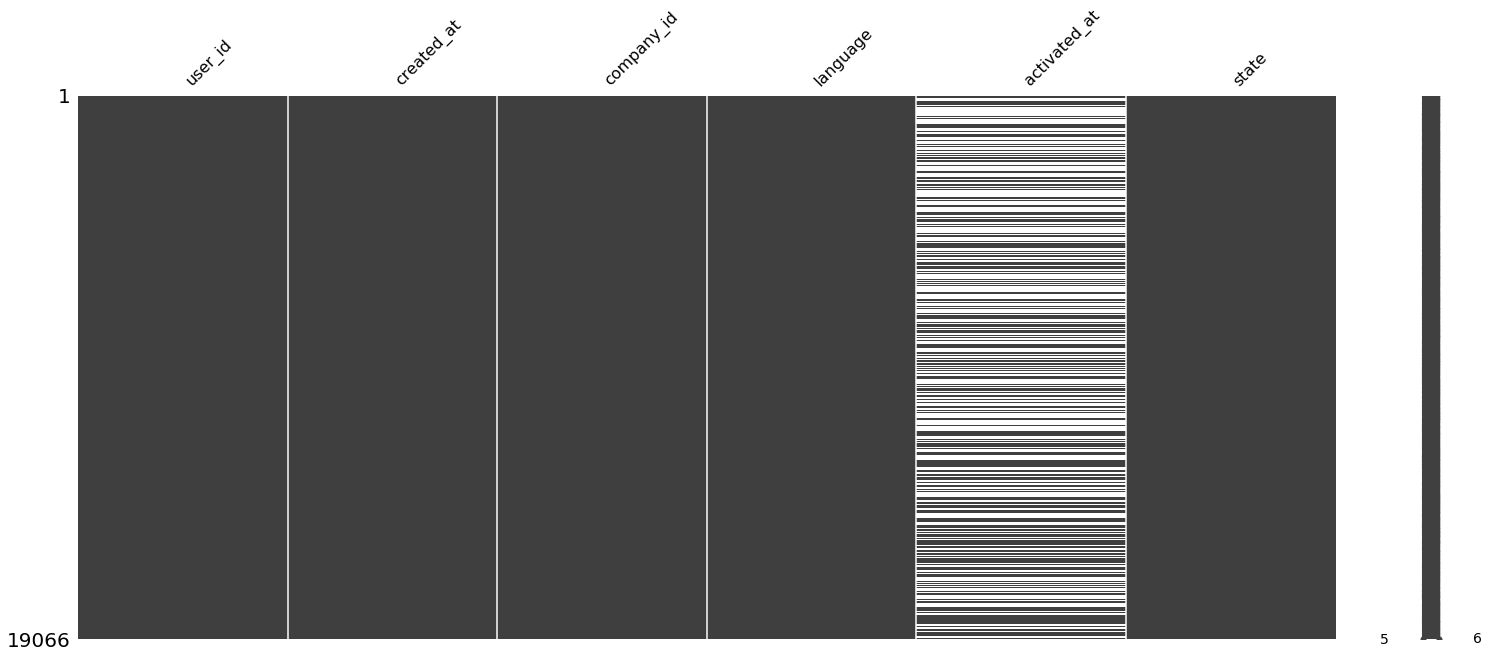

In [12]:
msno.matrix(users)

In [26]:
print(('There are {:.2f}% null values in the users dataframe speficically in the \
activated_at column. No other columns have null values.')\
.format(sum(users['activated_at'].isnull())/len(users)*100))

There are 50.80% null values in the users dataframe speficically in the activated_at column. No other columns have null values.


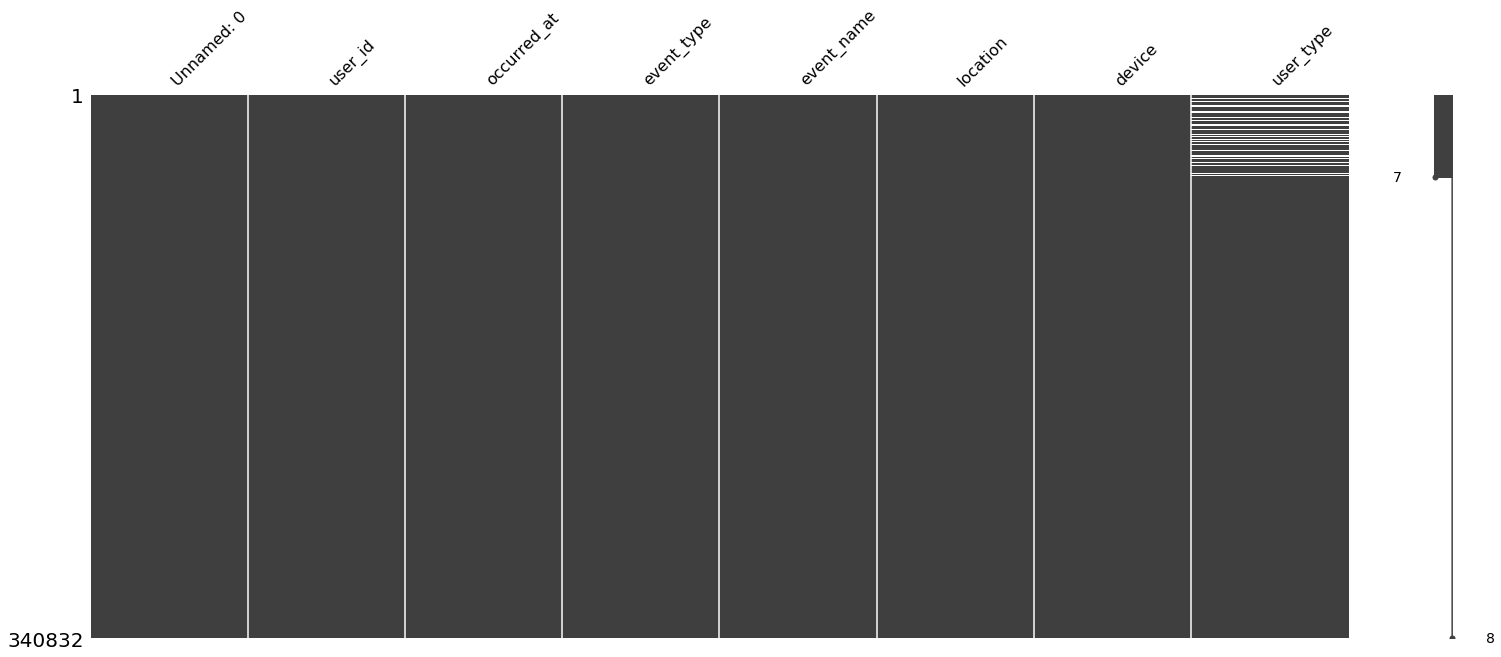

In [7]:
msno.matrix(events)

In [27]:
print('There are {:.2f}% null/missing entries only in th user_type column.'\
.format(sum(events['user_type'].isnull())/len(events)*100))

There are 4.57% null/missing entries only in th user_type column.


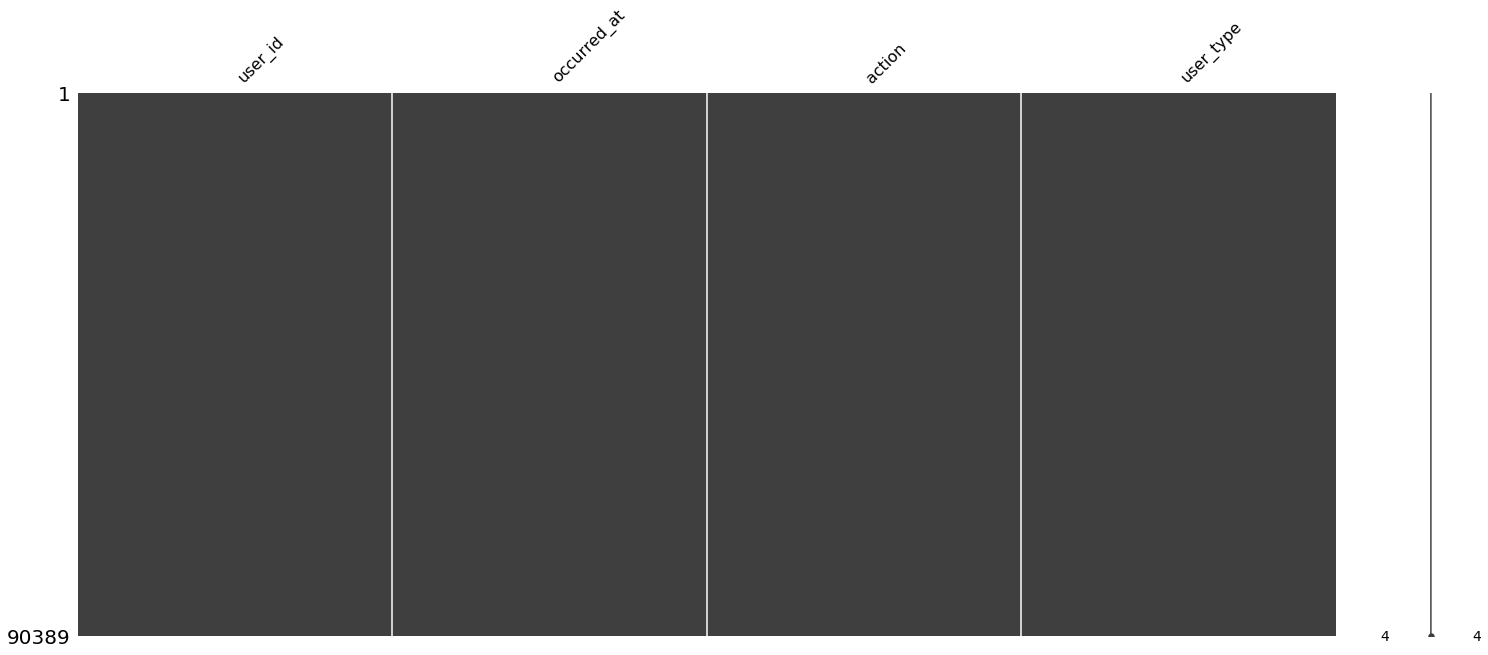

In [28]:
msno.matrix(email_events)

No missing/null values in the email_events dataframe.

#### Not doing anything with the missing values columns in the other two dataframes yet. Just exploring other columns and trying to understand what the data can tell.

## Basic exploratory analysis
- variation in the number of users per week in the time range
- exploration of the new sign-ups per week
- explore emil related events

In [53]:
#print(len(users['user_id'].unique()))
#print(len(events['user_id'].unique()))
#print(len(email_events['user_id'].unique()))
#print((len(email_events['user_id'].unique()))/(len(users['user_id'].unique())))

Text(0, 0.5, '# of users')

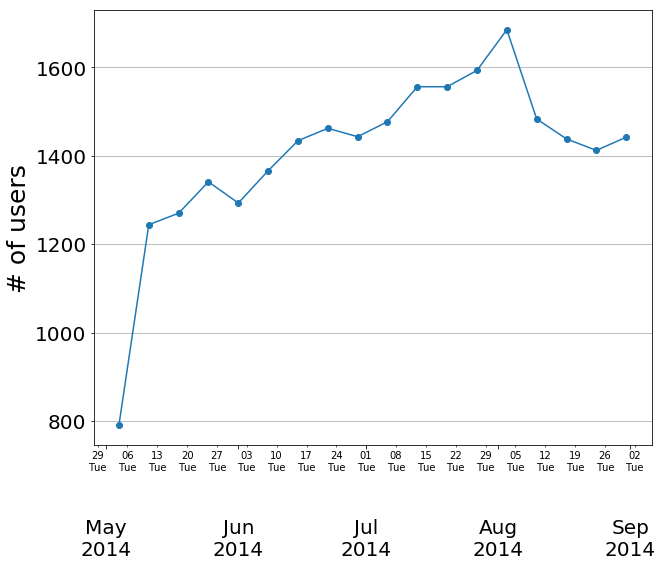

In [29]:
# variation in the number of users per week within the time range
weekly_users = events.set_index('occurred_at')['user_id'].resample('1W').nunique()


fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
ax.plot(weekly_users, 'o-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

#### This plot shows that there has been a sharp increase in the number of users from May 2014 to Aug 2014, after which the users started to drop.
#### Let's try to understand and find if there's any pattern that can be obtaied from the data.

Text(0, 0.5, '# of users')

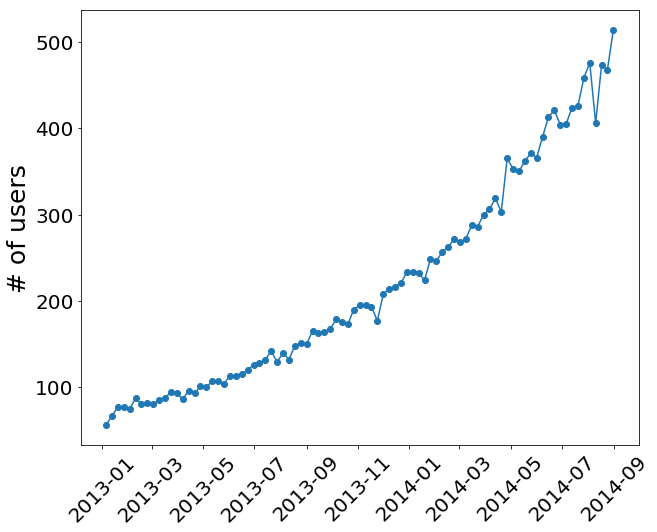

In [30]:
# explore if users are creating new accounts on the platform

create_acc_users = users.set_index('created_at')['user_id'].resample('1W').nunique()

fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
ax.plot(create_acc_users, 'o-')

ax.xaxis.set_tick_params(labelsize=20, rotation = 45)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

#### The number of new sign-ups have consistently increased. So moving on to other events to understand why the drop happened.

In [31]:
event_type = list(events['event_type'].unique())

Text(0, 0.5, '# of users')

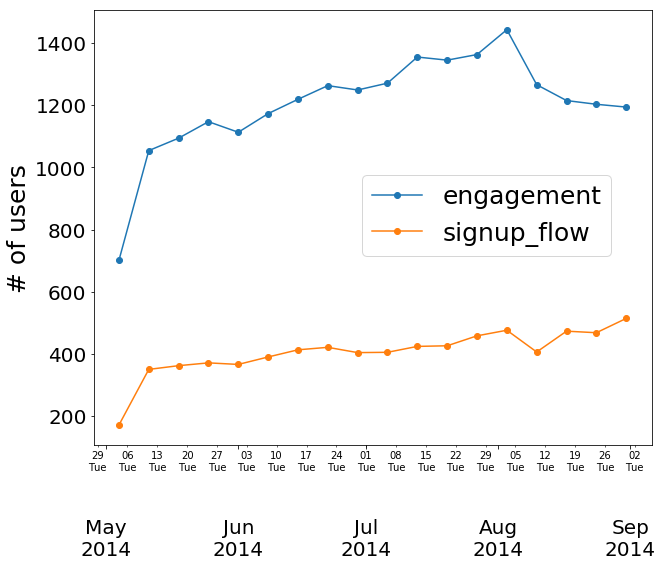

In [34]:
users_types_event = {}
for x in event_type:
    users_types_event[x] = events[events['event_type']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_types_event)

fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
#colors = iter(cm.prism(np.linspace(0, 1, len(devices))))

for k, v in users_types_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(0.95, 0.65), fontsize = 25)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

#### The plot above shows that despite the increased number of sign-ups the engagement on the platform has decreased. So now exploring the different types of events that users have taken on Yammer.

In [36]:
# all possible events for a user

all_events = list(events['event_name'].unique())

Text(0, 0.5, '# of users')

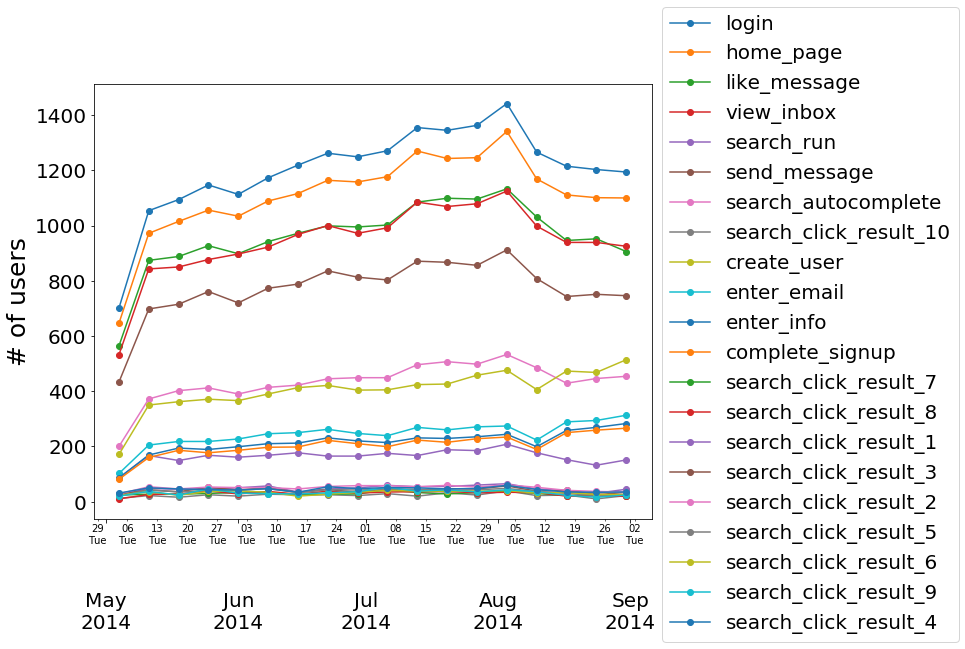

In [41]:
users_diff_event = {}
for x in all_events:
    users_diff_event[x] = events[events['event_name']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_diff_event)



fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}


for k, v in users_diff_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1, 1.2), fontsize = 20)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

In [42]:
few_events = all_events[6:]

Text(0, 0.5, '# of users')

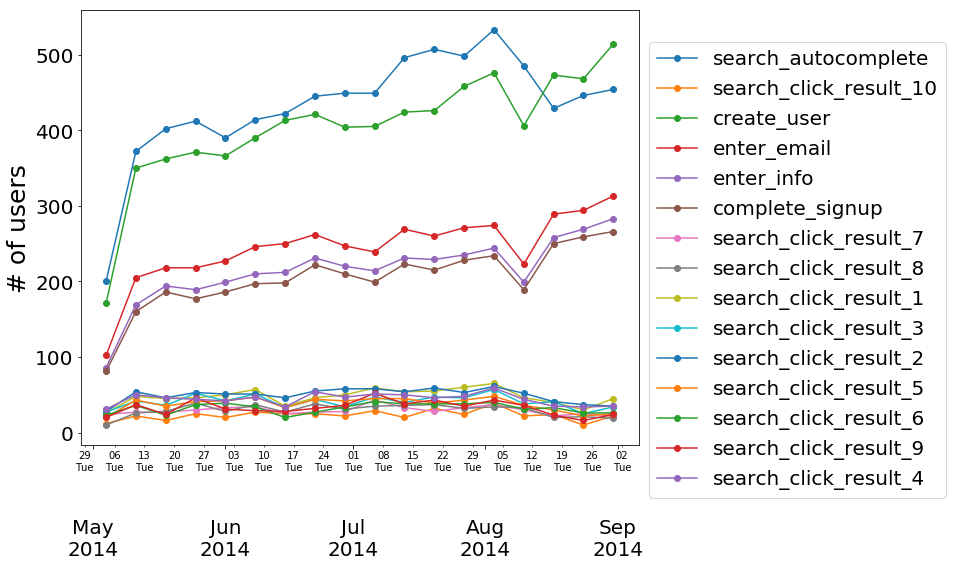

In [43]:
users_few_event = {}
for x in few_events:
    users_few_event[x] = events[events['event_name']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_few_event)



fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}


for k, v in users_few_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1, 0.95), fontsize = 20)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

#### There is a drop and an increase in the signing up events, which is different from the other popular events.

In [55]:
search_events = []
for i in range(len(all_events)):
    if 'search' in all_events[i]:
        search_events.append(all_events[i])

Text(0, 0.5, '# of users')

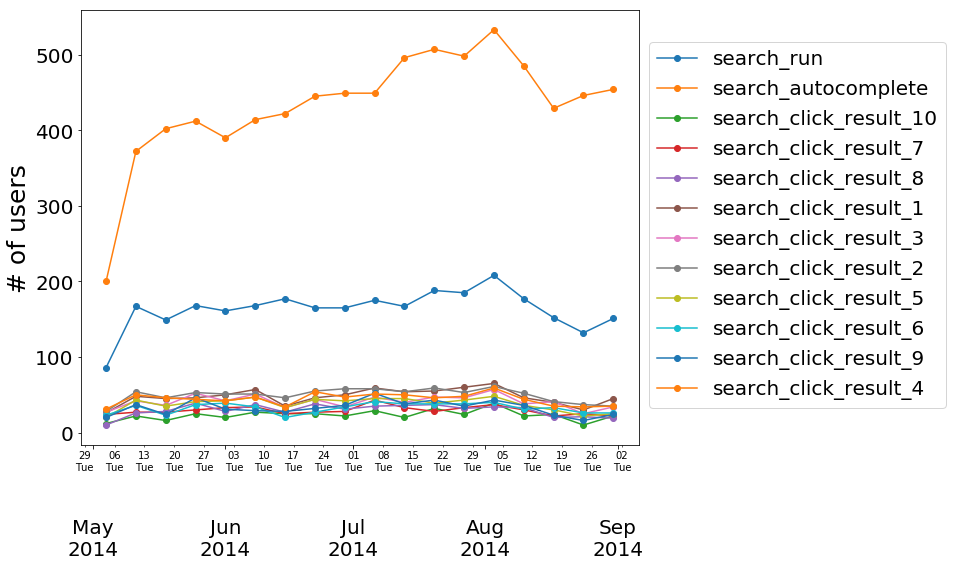

In [57]:
users_search_event = {}
for x in search_events:
    users_search_event[x] = events[events['event_name']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_search_event)



fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}


for k, v in users_search_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1, 0.95), fontsize = 20)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

#### The search auto-complete is used by more users.

#### Moving to how thwe email events behave.

Text(0, 0.5, '# of users')

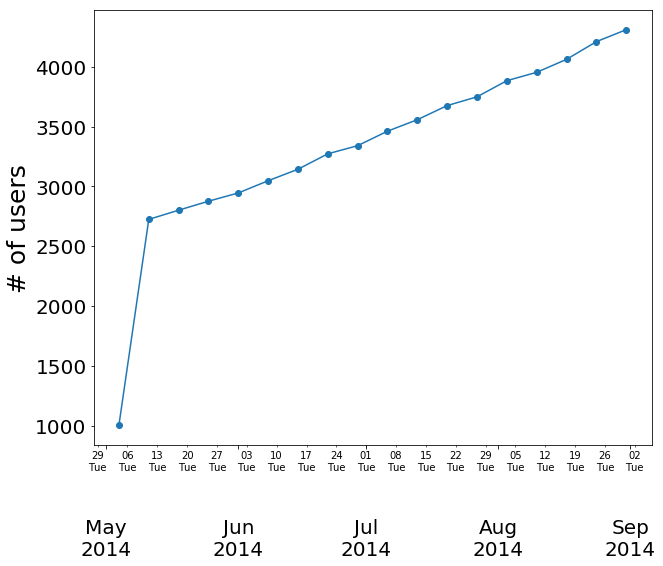

In [52]:
# explore the variation of email related events

email_users = email_events.set_index('occurred_at')['user_id'].resample('1W').nunique()


fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
ax.plot(email_users, 'o-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

### Insights
The drop in the number of users after Aug is likely due to logging in + sign-up issues.
Email related events/activities ore popular than searches.

### Suggestions
There should be regular check-ins to make sure that users are able to log in and use the platform.